Unsupervised Learning

K-Means clustering algorithm 

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [29]:
data=pd.read_csv('technical_support_data.csv')

In [31]:
data.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [33]:
data.shape

(23, 8)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PROBLEM_TYPE           23 non-null     object 
 1   no_of_cases            23 non-null     int64  
 2   Avg_pending_calls      23 non-null     float64
 3   Avg_resol_time         23 non-null     int64  
 4   recurrence_freq        23 non-null     float64
 5   Replace_percent        23 non-null     float64
 6   In_warranty_percent    23 non-null     int64  
 7   Post_warranty_percent  23 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 1.6+ KB


In [37]:
data.describe()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,142.782609,1.973913,63.000000,0.137826,0.100000,69.956522,30.043478
std,155.098197,0.982676,58.877376,0.118627,0.182109,37.350281,37.350281
min,3.000000,1.000000,5.000000,0.010000,0.000000,5.000000,0.000000
25%,23.500000,1.150000,17.000000,0.025000,0.000000,55.000000,0.000000
50%,72.000000,2.000000,35.000000,0.140000,0.000000,90.000000,10.000000
75%,211.500000,2.300000,128.500000,0.235000,0.130000,100.000000,45.000000
max,520.000000,4.300000,180.000000,0.350000,0.700000,100.000000,95.000000


In [39]:
data_attr=data.iloc[:,1:]
data_attr_scaled=data_attr.apply(zscore)

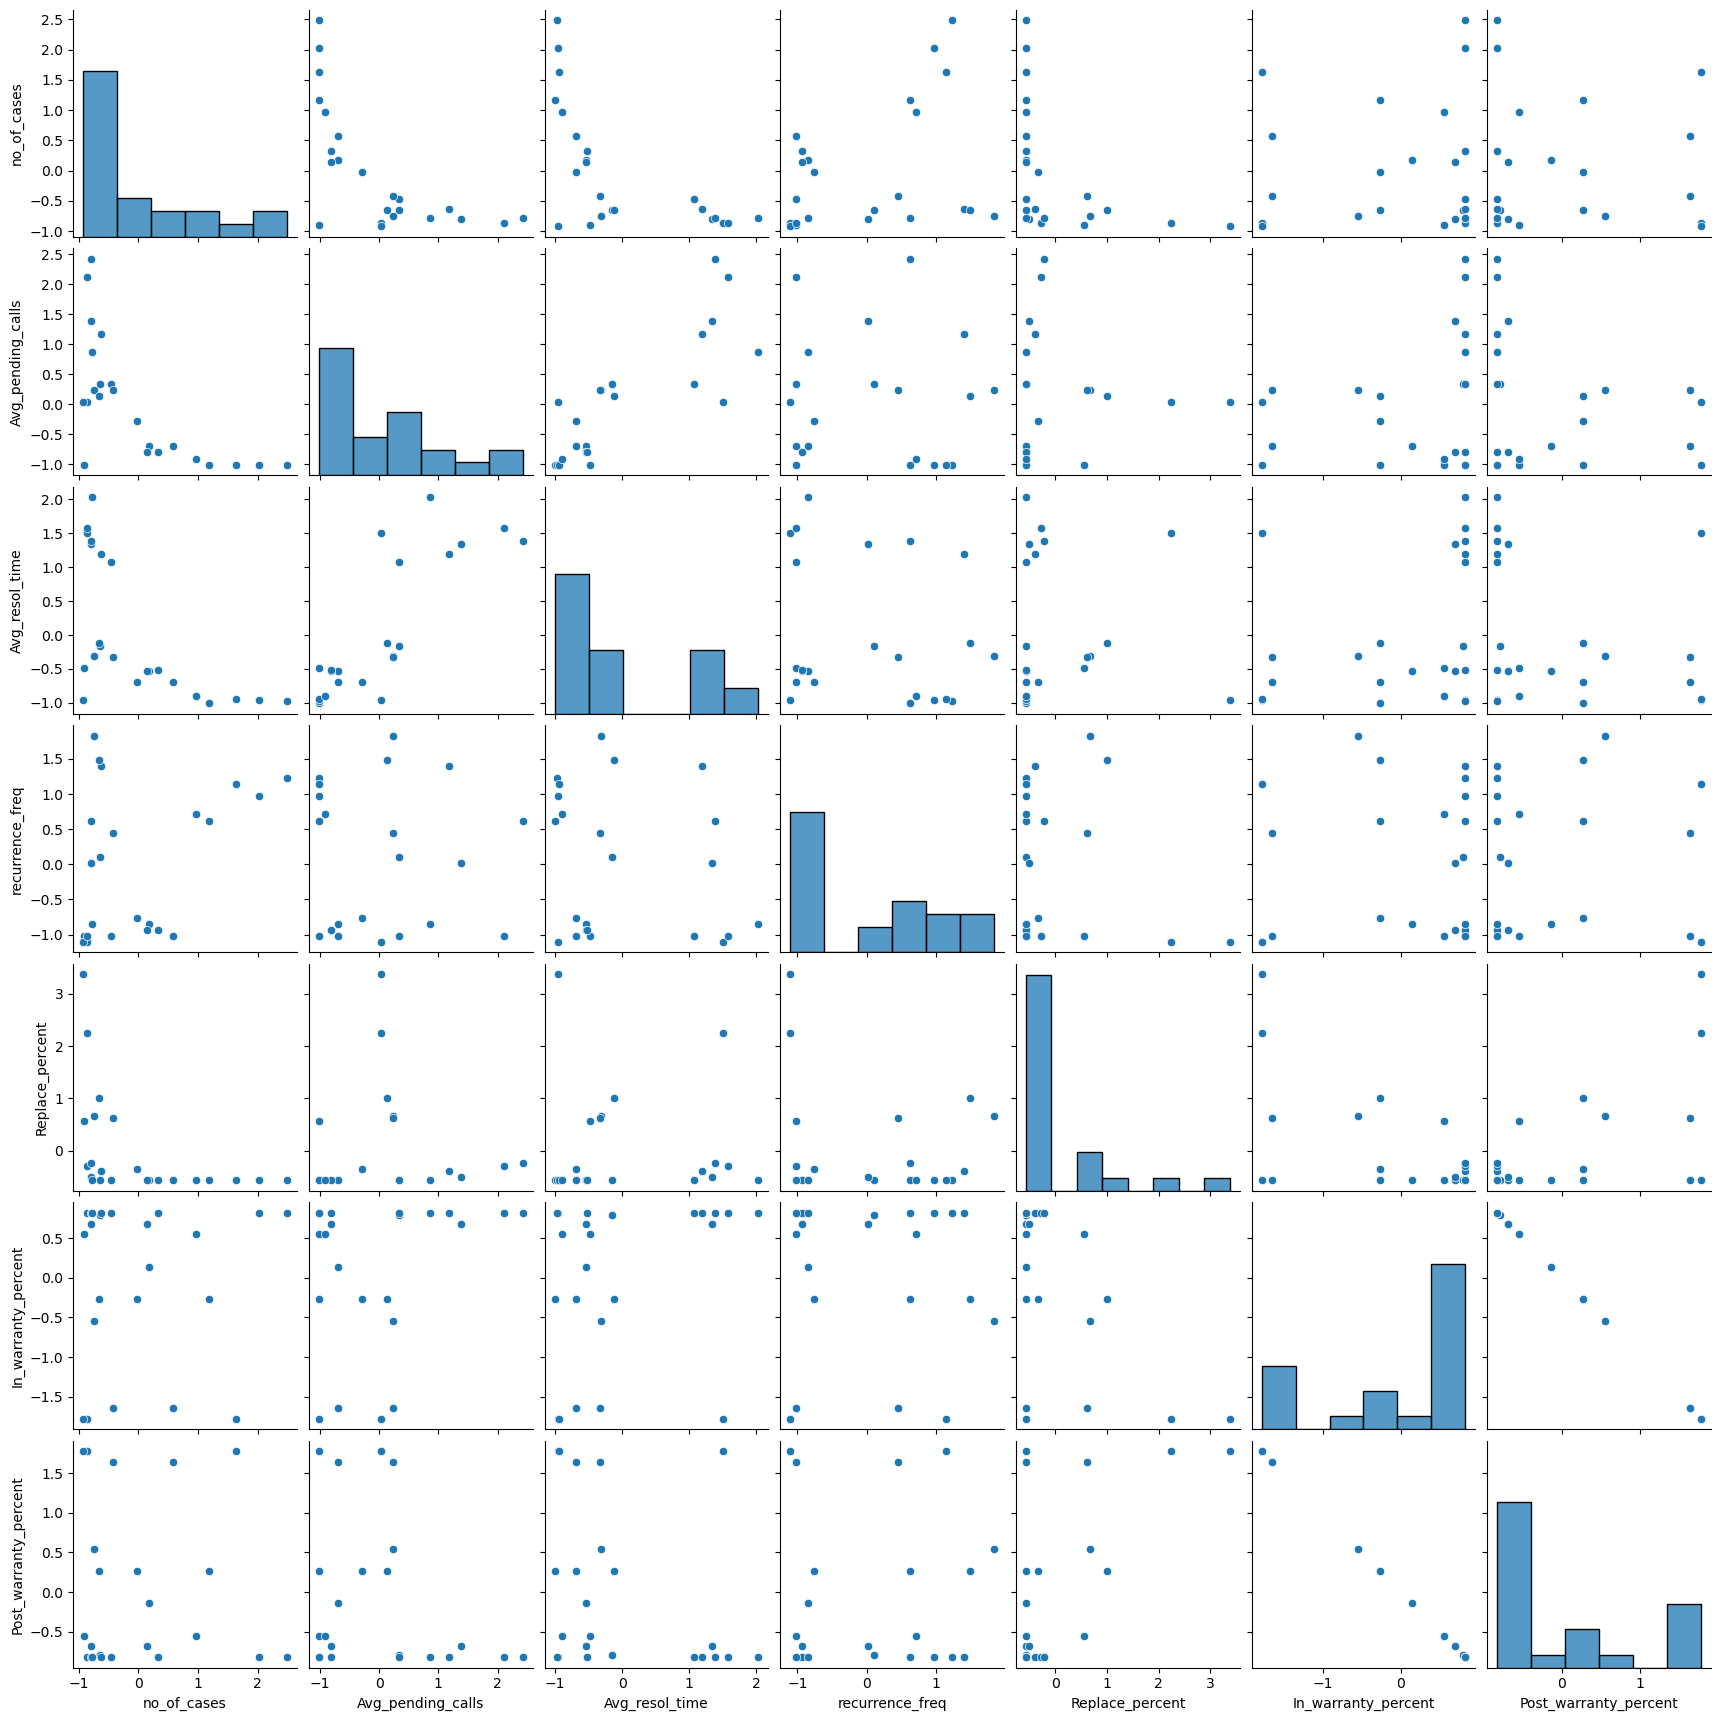

In [41]:
sns.pairplot(data_attr_scaled)

In [43]:
from scipy.spatial.distance import cdist

In [45]:
clusters=range(1,10)
meandistortions=[]

In [47]:
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data_attr_scaled)
    pred=model.predict(data_attr_scaled)
    meandistortions.append(sum(np.min(cdist(data_attr_scaled,model.cluster_centers_,'euclidean'),axis=1))/data_attr_scaled.shape[0])

C:\Users\ELCOT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ELCOT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ELCOT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ELCOT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

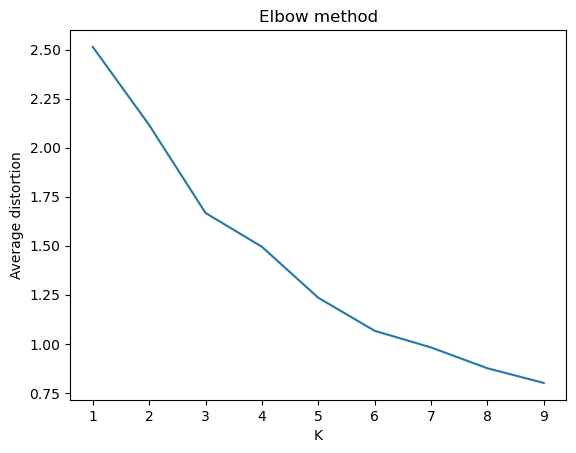

In [49]:
plt.plot(clusters,meandistortions)
plt.xlabel('K')
plt.ylabel('Average distortion')
plt.title('Elbow method')
plt.show()

In [51]:
model1=KMeans(6)
model1.fit(data_attr_scaled)
pred=model1.predict(data_attr_scaled)

C:\Users\ELCOT\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [53]:
data['Group']=pred
data_attr_scaled['Group']=pred
print("Groups assigned")
data_attr_scaled.head()

Groups assigned


,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,Group
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067,3
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204,0
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696,3
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204,0
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074,5


In [59]:
data_cluster=data.groupby(['Group'])


In [61]:
data_cluster.sum()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
Group,,,,,,,,
0,power chord does not tightly fitMain switch do...,15,4.0,158,0.02,1.20,10,190
1,AC stops abruptlyApp hangs while entring comma...,128,17.5,749,0.71,0.15,495,5
2,Unable to connect the App to the deviceRemote ...,1581,4.1,31,0.96,0.00,350,50
3,Temperature control not workingFan swing not w...,903,7.7,178,0.19,0.24,430,170
4,Motor noise from the system Battery backup doe...,540,7.5,154,1.12,0.71,125,275
5,Forgot mobile app passwordFactory settings not...,117,4.6,179,0.17,0.00,199,1
